In [1]:
# Import shit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style

In [2]:
# Import first column to use as headers
df_h = pd.read_csv("data_file/O_volatility.csv", 
                 skiprows=1,
                  usecols=[0],
                  nrows=23,
                  names=['head'])
df_h = df_h['head'].tolist()
headers = ['date']
headers.extend(df_h)

In [3]:
# Import and create dictionary for headers
    # Import
h_dict = pd.read_csv("data_file/O_volatility.csv", 
                 skiprows=1,
                  usecols=[0,1],
                  names=['code','header'],
                  nrows=23)

    # Drop 'Access Denied'
h_dict = h_dict[h_dict.header.str.contains("Access Denied")==False]

    # Create dict with index "header", value "code"
widget_dict = list(h_dict.set_index('header').to_dict().values()).pop()


In [4]:
# Import rest of file and apply headers
df = pd.read_csv("data_file/O_volatility.csv", 
                 na_values=['#N/A'],
                 usecols=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],
                 skiprows=2,
                names=headers)

# Drop columns that contain "do not"; ie that have no permission
for column in df:
    if "do not " in str(df.loc[0,column]):
        df = df.drop(column, axis=1)

In [5]:
# Converts date to datetime format, specifying original format
df['date'] = pd.to_datetime(df.date, format='%d/%m/%y')

In [6]:
# Create widgets for user input
    # Imports
import ipywidgets as wg
from IPython.display import display

    # Market selection
market = wg.Dropdown(
    options=widget_dict,
    description='Market:',
)
    # Start and end date selection
s_date = wg.DatePicker(
    description='Start Date')
e_date = wg.DatePicker(
    description='End Date')
    
    # Displays
display(market,s_date, e_date)



Dropdown(description='Market:', options={'MKT VOLTLTY ND/d': '.VIX', 'CBOE S&P500 3M/d': '.VIX3M', 'CBOE BP SP500V/d': '.BVZ', 'NASDAQ MKT VOL/d': '.VXN', 'CBOE RUS 2000 /d': '.RVX', 'DJIA VOLATILIT/d': '.VXD', 'OEX MKT VOL ND/d': '.VXO', 'S&P CompLow Vo/d': '.GSPTXLV', 'EURO STOXX VOL/d': '.V2TX', 'FTSE 100 VOL IND': '.VFTSE', 'CAC 40 VOLA ID/d': '.VCAC', 'DAX-NEW VOLATI/d': '.V1XI', 'AEX VOLT INDEX/d': '.VAEX', 'VSMI VOLATILIT/d': '.V3X', 'HSI VOLATILITY/d': '.VHSI', 'HANG SENG L V /d': '.HSLVI', 'Volatility Ind/d': '.KSVKOSPI', 'SAVI TOP 40     ': '.JSAVI'}, value='.VIX')

DatePicker(value=None, description='Start Date')

DatePicker(value=None, description='End Date')

Text(0,0.5,'Value')

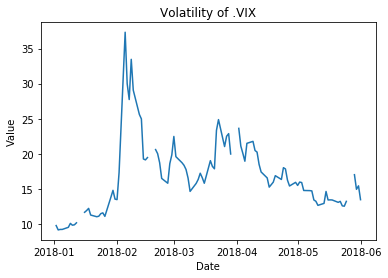

In [12]:
# Define plot varialbes
plot_range = df[df.date.between(s_date.value,e_date.value)]
plot_date = plot_range['date']
plot_var = plot_range[market.value]

# Plot
%matplotlib inline
plt.plot(plot_date,plot_var)
plt.title('Volatility of '+ market.value)
plt.xlabel('Date')
plt.ylabel('Value')

In [10]:
# TEST CELL
df[df.date.between(s_date.value,e_date.value)]

,date,.VIX,.VIX3M,.BVZ,.VXN,.RVX,.VXD,.VXO,.GSPTXLV,.V2TX,.VFTSE,.VCAC,.V1XI,.VAEX,.V3X,.VHSI,.HSLVI,.KSVKOSPI,.JSAVI
4,2018-06-01,13.46,15.27,13.46,15.11,14.84,14.37,12.52,415.64,15.6231,12.426,14.765,16.53,13.256,14.5643,17.62,8976.30,13.18,16.88
5,2018-05-31,15.43,16.33,15.43,16.78,16.17,16.15,13.98,415.31,17.6547,13.525,16.337,17.70,14.613,15.4351,18.20,8982.50,14.55,17.15
6,2018-05-30,14.94,16.00,14.94,17.07,15.39,15.55,13.56,416.09,18.3411,13.651,16.318,17.63,14.905,15.4545,20.04,8875.45,15.52,17.67
7,2018-05-29,17.02,17.13,17.02,18.42,16.79,17.29,15.41,415.38,20.1545,15.440,17.706,19.15,16.176,15.6261,18.74,8947.02,12.93,17.67
8,2018-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,417.78,17.7786,11.285,15.930,17.97,14.881,14.4033,17.17,9004.81,12.55,16.89
